Yolov8의 Object Detection 학습을 위한 데이터셋 형식을 살펴봅시다

https://docs.ultralytics.com/datasets/detect/

```
<object-class> <x-center> <y-center> <width> <height>
```

* 0~1 사이로 표준화

* class 정보와 파일 경로는 yaml 파일에 저장

추후 파일을 살펴보기 위해서 git clone을 통해 코드를 복사하여 설치해봅시다

In [1]:
!git clone https://github.com/ultralytics/ultralytics
!cd ultralytics
!pip install -e .


Cloning into 'ultralytics'...
remote: Enumerating objects: 8156, done.
remote: Counting objects: 100% (1760/1760), done.
remote: Compressing objects: 100% (1010/1010), done.
remote: Total 8156 (delta 999), reused 1269 (delta 726), pack-reused 6396
Receiving objects: 100% (8156/8156), 6.04 MiB | 18.90 MiB/s, done.
Resolving deltas: 100% (5353/5353), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


기본 데이터셋을 불러오기 위해서 모델을 불러와보겠습니다. 

In [3]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
results = model.train(data='coco128.yaml', epochs=1)

New https://pypi.org/project/ultralytics/8.0.97 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.96 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torch

다운로드된 데이터셋을 살펴봅시다

우선 이미지를 하나 불러보겠습니다. 

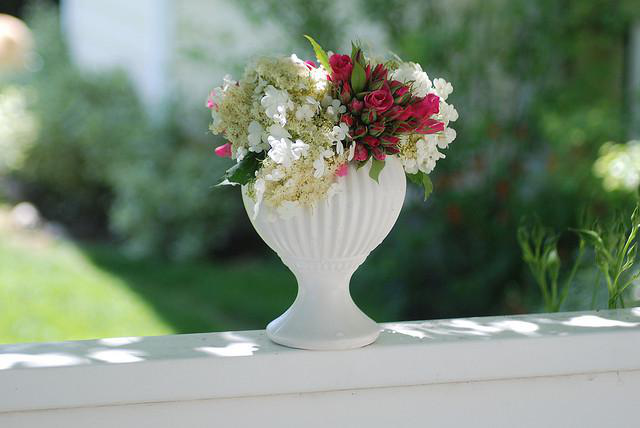

In [4]:
from PIL import Image

image = Image.open("/content/datasets/coco128/images/train2017/000000000030.jpg")
image.show()

해당하는 데이터 라벨을 불러봅시다

여러 줄을 불러와야 하므로 readlines를 사용하겠습니다. 

In [5]:

with open("/content/datasets/coco128/labels/train2017/000000000030.txt", "r") as file:
    # Read the contents of the file
    lines = file.readlines()

In [6]:
labels = []
for line in lines:
  parts = line.strip().split()  # 공백 제거 및 리스트 변환
  class_id = int(parts[0])
  x_center = float(parts[1])
  y_center = float(parts[2])
  width = float(parts[3])
  height = float(parts[4])
  labels.append([class_id, x_center, y_center, width, height])

In [7]:
labels

[[58, 0.519219, 0.451121, 0.39825, 0.75729],
 [75, 0.501188, 0.592138, 0.26, 0.456192]]

여러 줄로 구성되어 있으므로 데이터셋의 설명에 따라서 값을 읽어보겠습니다. 
```
<object-class> <x-center> <y-center> <width> <height>
```

라벨을 이미지에 표시하려면 이미지의 사이즈를 알아야 합니다. 

In [8]:
width, height = image.size

이미지를 불러와서 라벨을 그려봅시다

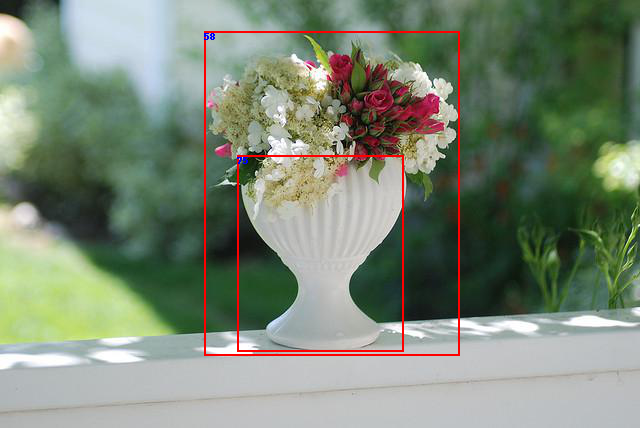

In [9]:
from PIL import ImageDraw

# 이미지 불러오기
image = Image.open("/content/datasets/coco128/images/train2017/000000000030.jpg")
draw = ImageDraw.Draw(image)  

# width, height를 곱하여 원래 이미지 크기에 맞는 값으로 변환
for i in labels:
  y = str(i[0]) # class
  p1 = i[1]*width # x center
  p2 = i[2]*height # y center
  p3 = i[3]*width  # width
  p4 = i[4]*height  # height

  # PIL의 좌표로 변환
  x_min = int(p1-p3/2)
  y_min = int(p2-p4/2)
  x_max = int(p1+p3/2)
  y_max = int(p2+p4/2)

  point1 = (x_min,y_min)  # PIL 위치는 리스트가 아닌 튜플로 입력해야 함
  point2 = (x_max,y_max)
  draw.rectangle((point1, point2), outline = 'red', width = 2)
  draw.text((x_min,y_min), y,fill = (0,0,255))

image

라벨 정보를 살펴봅시다

In [10]:
!ls

datasets  drive  runs  sample_data  ultralytics  yolov8n.pt


In [11]:
import yaml

# YAML 파일을 열고 읽어서 데이터를 파싱합니다.
with open("/content/ultralytics/ultralytics/datasets/coco128.yaml", "r") as f:
    data = yaml.safe_load(f)

In [12]:
data

{'path': '../datasets/coco128',
 'train': 'images/train2017',
 'val': 'images/train2017',
 'test': None,
 'names': {0: 'person',
  1: 'bicycle',
  2: 'car',
  3: 'motorcycle',
  4: 'airplane',
  5: 'bus',
  6: 'train',
  7: 'truck',
  8: 'boat',
  9: 'traffic light',
  10: 'fire hydrant',
  11: 'stop sign',
  12: 'parking meter',
  13: 'bench',
  14: 'bird',
  15: 'cat',
  16: 'dog',
  17: 'horse',
  18: 'sheep',
  19: 'cow',
  20: 'elephant',
  21: 'bear',
  22: 'zebra',
  23: 'giraffe',
  24: 'backpack',
  25: 'umbrella',
  26: 'handbag',
  27: 'tie',
  28: 'suitcase',
  29: 'frisbee',
  30: 'skis',
  31: 'snowboard',
  32: 'sports ball',
  33: 'kite',
  34: 'baseball bat',
  35: 'baseball glove',
  36: 'skateboard',
  37: 'surfboard',
  38: 'tennis racket',
  39: 'bottle',
  40: 'wine glass',
  41: 'cup',
  42: 'fork',
  43: 'knife',
  44: 'spoon',
  45: 'bowl',
  46: 'banana',
  47: 'apple',
  48: 'sandwich',
  49: 'orange',
  50: 'broccoli',
  51: 'carrot',
  52: 'hot dog',
  53: 

In [13]:
classes = data['names']

In [14]:
classes

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

클래스 번호 대신 라벨로 출력해봅시다

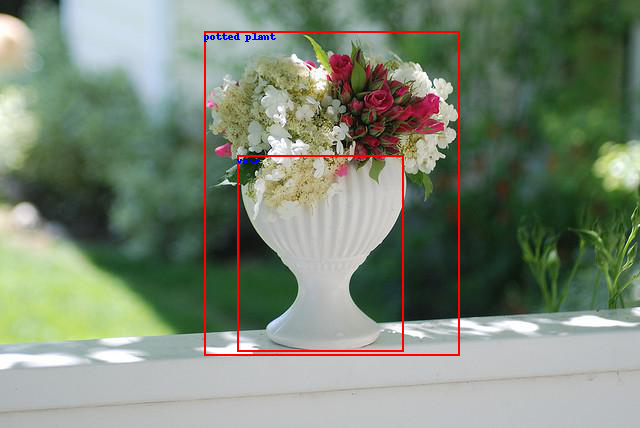

In [16]:
# 이미지 불러오기
image = Image.open("/content/datasets/coco128/images/train2017/000000000030.jpg")
draw = ImageDraw.Draw(image)  

# width, height를 곱하여 원래 이미지 크기에 맞는 값으로 변환
for i in labels:
  y = classes[i[0]] # class
  p1 = i[1]*width # x center
  p2 = i[2]*height # y center
  p3 = i[3]*width  # width
  p4 = i[4]*height  # height
  

  # PIL의 좌표로 변환
  x_min = int(p1-p3/2)
  y_min = int(p2-p4/2)
  x_max = int(p1+p3/2)
  y_max = int(p2+p4/2)

  point1 = (x_min,y_min)  # PIL 위치는 리스트가 아닌 튜플로 입력해야 함
  point2 = (x_max,y_max)
  draw.rectangle((point1, point2), outline = 'red', width = 2)
  draw.text((x_min,y_min), y,fill = (0,0,255))

image